In [1]:
import pandas as pd
import numpy as np
import re
import glob
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.set(font_scale = 1.4)

In [31]:
data = pd.read_csv('../results/autocorrelation_nofrc1.csv',index_col=0)

In [32]:
# get rid of boring data :
data = data[data.dt < 100]
data = data[data.dt > 1]
data = data.dropna()
print(data.columns)

Index(['id', 'dt', 'auto correlation', 'lambda', 'max act'], dtype='object')


In [6]:
# set costom colors : 
cmap = plt.get_cmap('PuOr')
colors = [cmap(x) for x in np.linspace(0,1,10)]
print(colors)

[(0.4980392156862745, 0.23137254901960785, 0.03137254901960784, 1.0), (0.7192618223760092, 0.3612456747404844, 0.0289119569396386, 1.0), (0.9007304882737408, 0.5513264129181084, 0.13917723952326025, 1.0), (0.9934640522875817, 0.7738562091503267, 0.49673202614379075, 1.0), (0.9842368319876971, 0.9173394848135332, 0.823683198769704, 1.0), (0.8995001922337563, 0.9039600153787005, 0.9418685121107266, 1.0), (0.7477124183006537, 0.7320261437908498, 0.8562091503267975, 1.0), (0.540407535563245, 0.49404075355632454, 0.7037293348712035, 1.0), (0.34632833525567086, 0.182160707420223, 0.5471741637831603, 1.0), (0.17647058823529413, 0.0, 0.29411764705882354, 1.0)]


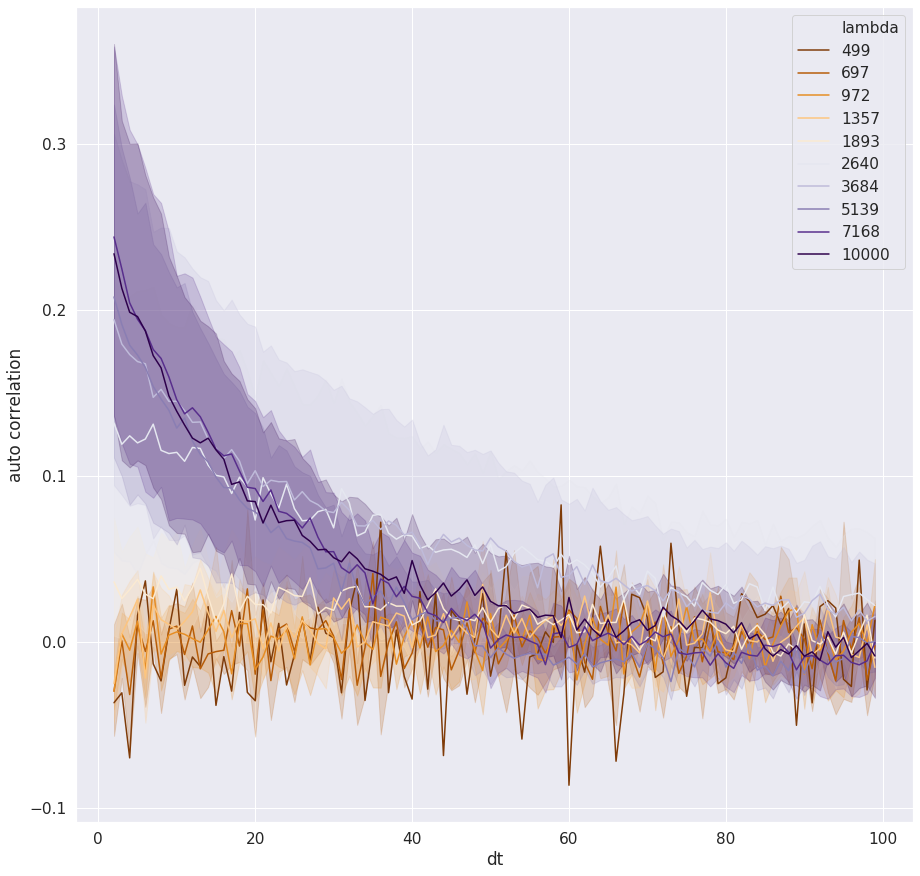

In [23]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'dt', y = 'auto correlation', hue = 'lambda',legend = 'full', palette = colors
             ,data = data, dashes = False)#units = 'id',estimator = None
plt.show()

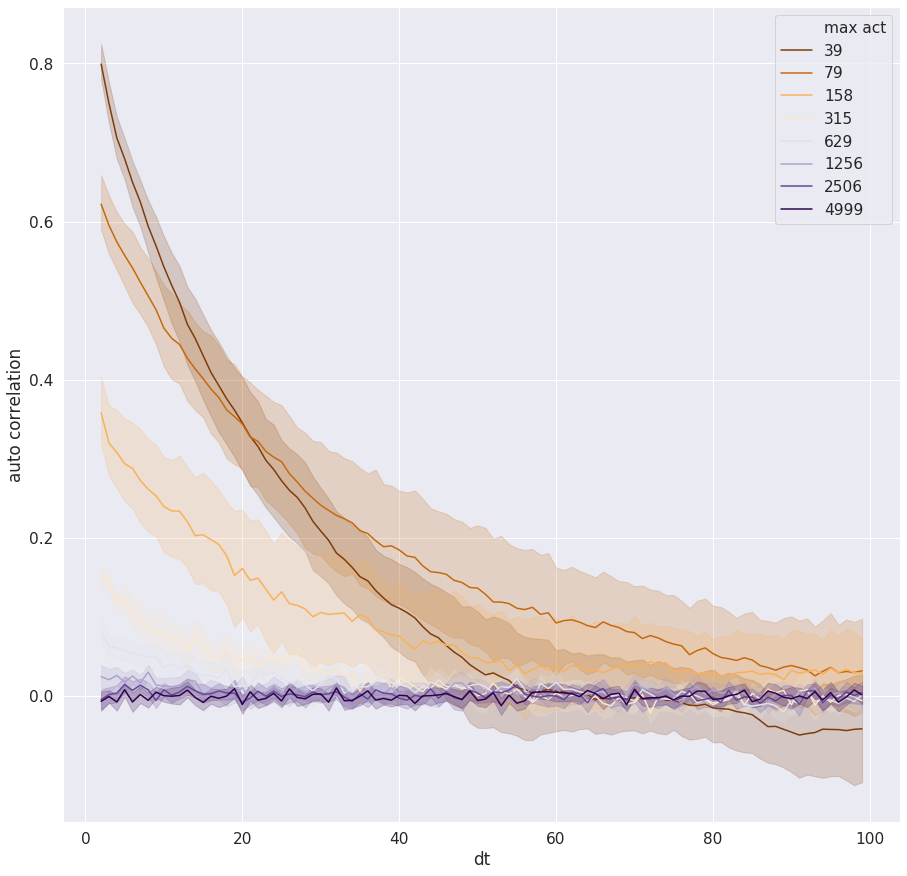

In [14]:
colors2 = [cmap(x) for x in np.linspace(0,1,8)]
plt.figure(figsize = (15,15))
sns.lineplot(x = 'dt', y = 'auto correlation', hue = 'max act' ,legend = 'full'
             ,palette = colors2, data = data, dashes = False)
plt.show()

     id  dt  auto correlation  lambda  max act             params
902   3   2         -0.012982   10000     1256  (10000.0, 1256.0)
903   3   3          0.028831   10000     1256  (10000.0, 1256.0)
904   3   4          0.005954   10000     1256  (10000.0, 1256.0)
905   3   5          0.051287   10000     1256  (10000.0, 1256.0)
906   3   6          0.053238   10000     1256  (10000.0, 1256.0)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41720 entries, 902 to 92999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                41720 non-null  int64  
 1   dt                41720 non-null  int64  
 2   auto correlation  41720 non-null  float64
 3   lambda            41720 non-null  int64  
 4   max act           41720 non-null  int64  
 5   params            41720 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 2.2+ MB
None


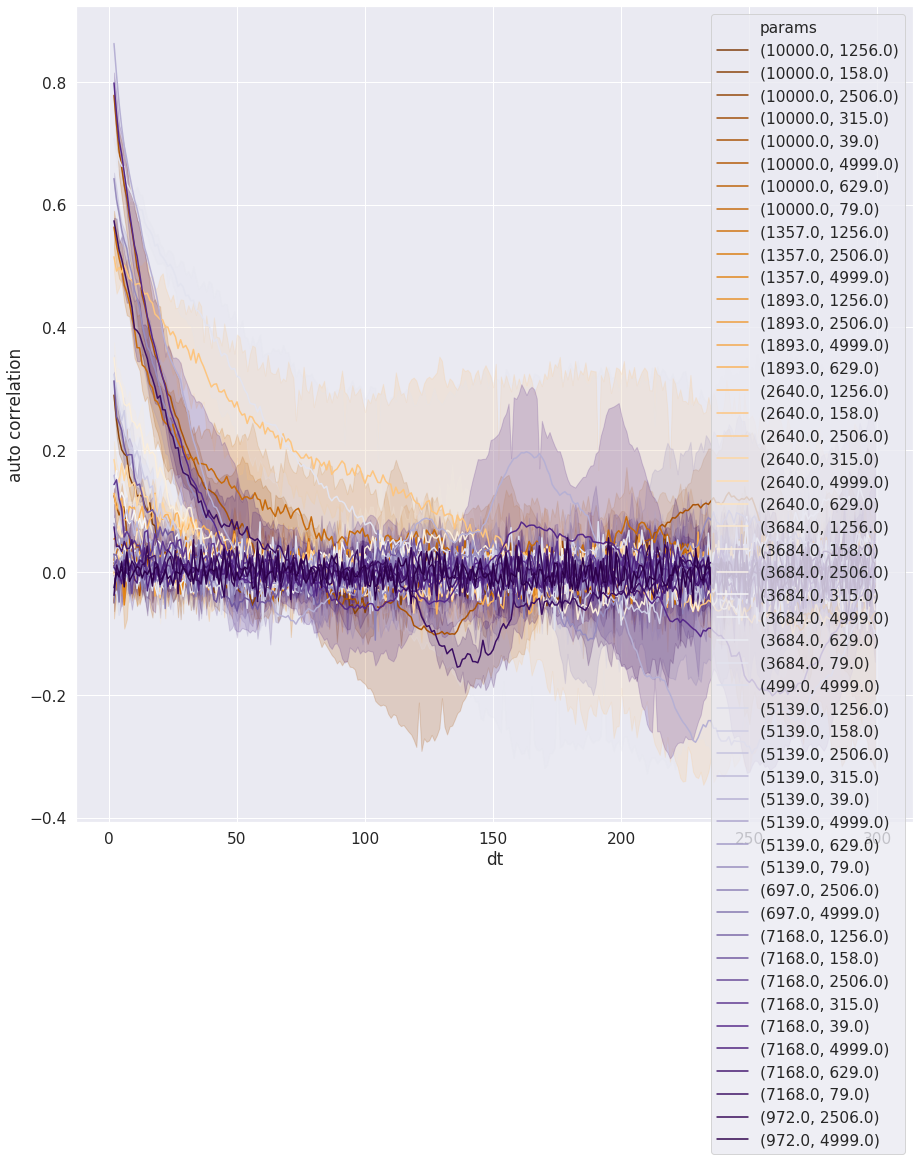

In [44]:
data = pd.read_csv('../results/autocorrelation_nofrc1.csv',index_col=0)
data = data[data.dt > 1]
data = data.dropna()

# plots per paramset : 
def to_params(x1,x2):
    return (x1,x2)

data['params'] = data.apply(lambda x: to_params(x['lambda'],x['max act']),axis = 1)
uniq_params = data['params'].unique()
print(data.head())
print(data.info())
colors2 = [cmap(x) for x in np.linspace(0,1,len(uniq_params))]
plt.figure(figsize = (15,15))
sns.lineplot(x = 'dt', y = 'auto correlation', hue = 'params'
             ,palette = colors2, data = data, dashes = False)

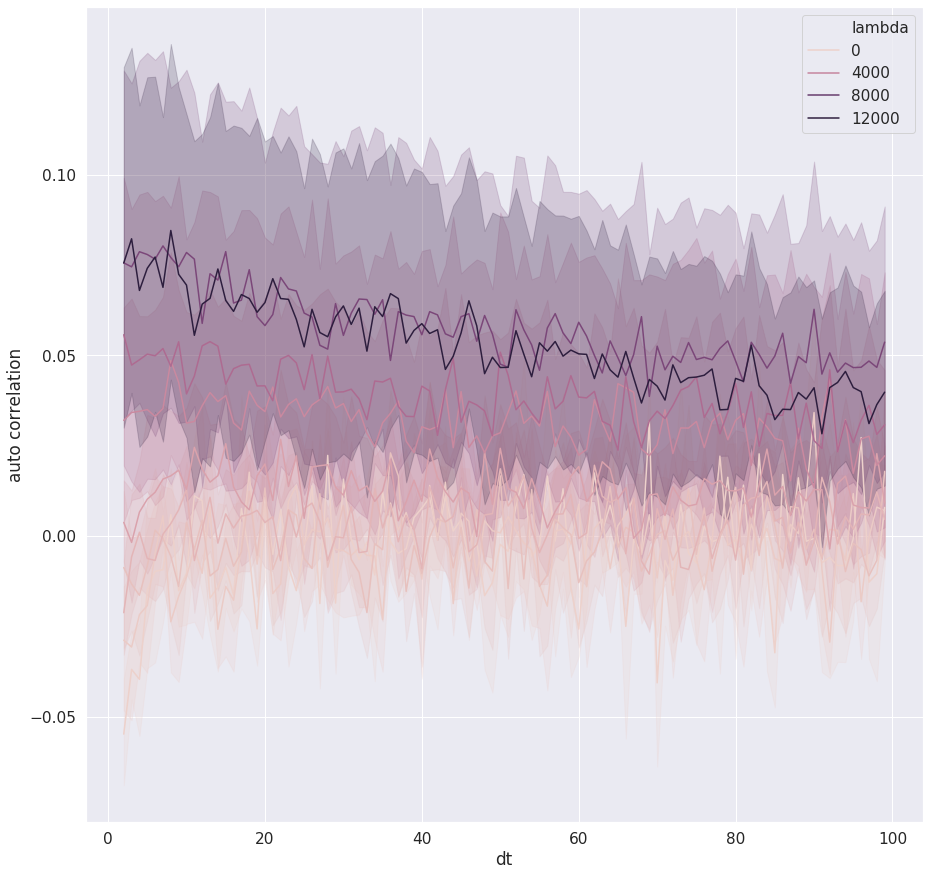

In [17]:
# next 
data = pd.read_csv('../results/autocorrelation_nofrc2.csv',index_col=0)
# get rid of boring data :
data = data[data.dt < 100]
data = data[data.dt > 1]
data = data.dropna()
# plot :
plt.figure(figsize = (15,15))
sns.lineplot(x = 'dt', y = 'auto correlation', hue = 'lambda', data = data, dashes = False)
plt.show()

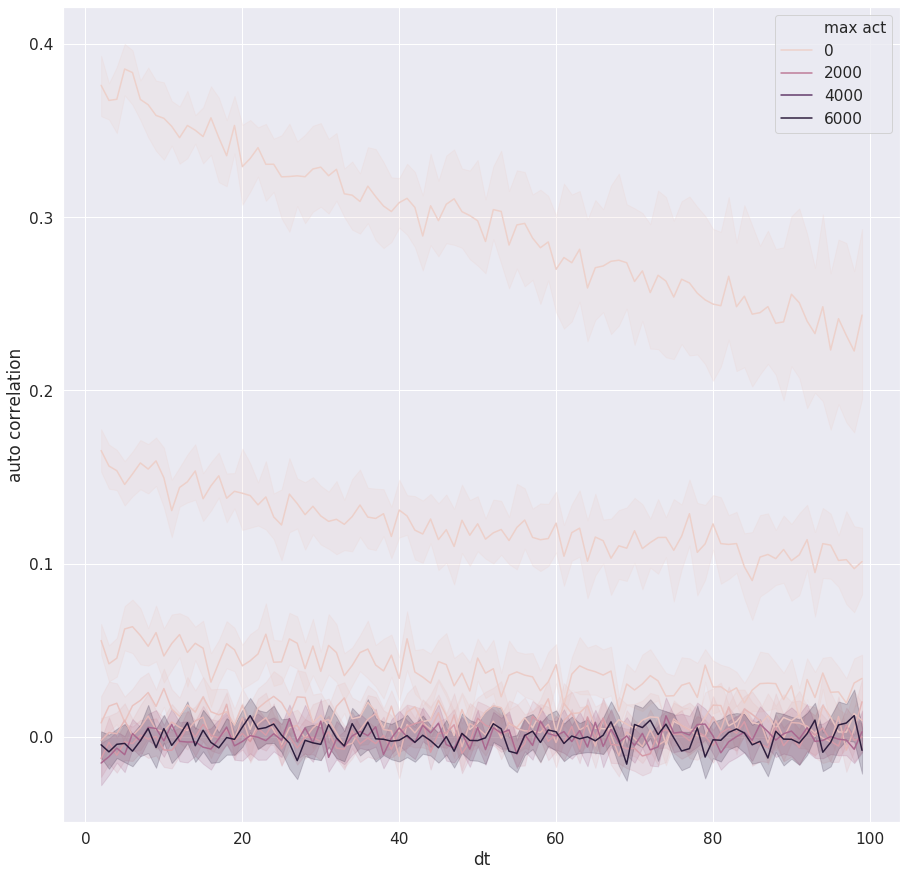

In [18]:
plt.figure(figsize = (15,15))
sns.lineplot(x = 'dt', y = 'auto correlation', hue = 'max act', data = data, dashes = False)
plt.show()